# References
1.   https://mml-book.github.io/book/mml-book.pdf
2.   https://docs.pytorch.org/docs/stable/linalg.html

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# utils

In [2]:

def show_vectors(*args: torch.tensor, zoom=1, color_map=None, equal_scale=True):
    fig, ax = plt.subplots()
    if not color_map:
        color_map = ["b"] * len(args)

    for c, vec in zip(color_map, args):
        ax.quiver(0, 0, *vec, angles='xy', scale_units='xy', scale=1, color=c)
        ax.annotate([round(_.item(), 1) for _ in vec], (vec[0].item(), vec[1].item()))

    x_lim = max(abs(vec[0].item()) for vec in args)
    y_lim = max(abs(vec[1].item()) for vec in args)

    ax.set_xlim(-x_lim - zoom, x_lim + zoom)
    ax.set_ylim(-y_lim - zoom, y_lim + zoom)

    if equal_scale:
        ax.set_aspect('equal')  # keep x and y scale the same

    ax.grid()
    plt.tight_layout()
    plt.show()


# linear systems

In [3]:
A = torch.tensor([[5.,1.],[3.,-4.]])
b = torch.tensor([[8.,14.]])

In [4]:
A.size(), b.size()

(torch.Size([2, 2]), torch.Size([1, 2]))

In [5]:
inverse = 1/torch.linalg.det(A)*torch.tensor([[-4.,-1.],[-3.,5.]])
inverse

tensor([[ 0.1739,  0.0435],
        [ 0.1304, -0.2174]])

In [6]:
A @ inverse

tensor([[1., 0.],
        [0., 1.]])

In [7]:
# to solve the linear system Ax = b --> x = b@A^-1
x = inverse@b.T
x

tensor([[ 2.0000],
        [-2.0000]])

In [8]:
A@x # as we can see now we found x such that x @ A gives b

tensor([[ 8.0000],
        [14.0000]])

In [9]:
# using pytorch
torch.linalg.solve(A, b.T)

tensor([[ 2.],
        [-2.]])

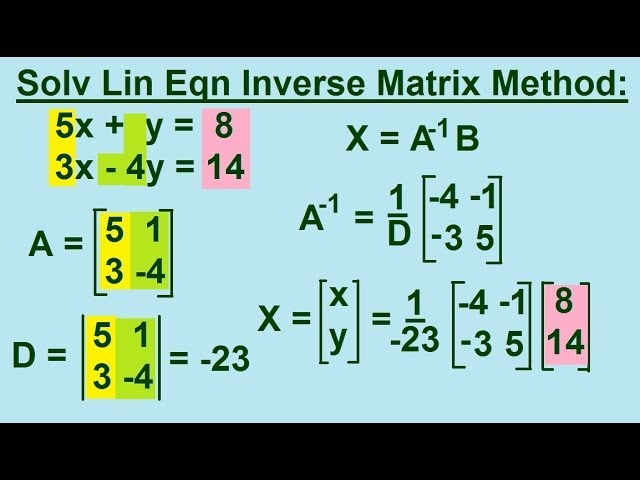

## what happens if the matrix is not square? (chptr 2.3)

In [10]:
# the type of solution we saw before can be used if and only if the matrix is square and INVERTIBLE
# the following is a overdetermined system (more equations than variables)

In [11]:
A = torch.tensor([[1., 2.],
                  [3., 4.],
                  [5., 6.]])
b = torch.tensor([7., 8., 9.]).reshape(-1,1)
try:
  torch.linalg.det(A)
except Exception as e:
  print(e)


linalg.det: A must be batches of square matrices, but they are 3 by 2 matrices


In [12]:
# to solve this issue we have to make the matrix squared by multiplying both terms by A.T
# Ax=b --> (A.T @ A) @ x = A.T @ b
A.T @ A

tensor([[35., 44.],
        [44., 56.]])

In [13]:
# now we can solve the system by multiplying both terms by (A.T @ A)^-1
# Ax=b --> (A.T @ A) @ x = A.T @ b --> multiply both terms by (A.T @ A)^-1 = torch.linalg.inv(A.T@A) -> x (A.T @ A)^-1 @ A.T
# we obtain x as:
torch.linalg.inv(A.T@A)@A.T # multiply by b and we found x, --> THIS IS ALSO KNOWN AS PSEUDO INVERSE

tensor([[-1.3333, -0.3333,  0.6667],
        [ 1.0833,  0.3333, -0.4167]])

In [14]:
x = torch.linalg.inv(A.T@A)@A.T @ b
x

tensor([[-6.0000],
        [ 6.5000]])

In [15]:
x = torch.linalg.inv(A.T @ A) @ A.T @ b


In [16]:
A@x


tensor([[7.0000],
        [7.9999],
        [8.9999]])

In [17]:
# to calculate the pseudo inverse we can use pytorch
torch.linalg.pinv(A)

tensor([[-1.3333, -0.3333,  0.6667],
        [ 1.0833,  0.3333, -0.4167]])

In [18]:
torch.allclose(torch.linalg.pinv(A), torch.linalg.inv(A.T@A)@A.T, atol = 10e-5)

True

# Basis and Vector Spaces

In [19]:
v_standard_basis = torch.tensor([1,2],dtype = torch.float32)

In [20]:
# standard basis 2D
e1 = torch.tensor([[1,0]], dtype = torch.float32).T
e2 =torch.tensor([[0,1]], dtype = torch.float32).T
e1,e2

(tensor([[1.],
         [0.]]),
 tensor([[0.],
         [1.]]))

In [21]:
standard_basis= torch.stack((e1,e2),dim =1) # stack the basis by columns
standard_basis

tensor([[[1.],
         [0.]],

        [[0.],
         [1.]]])

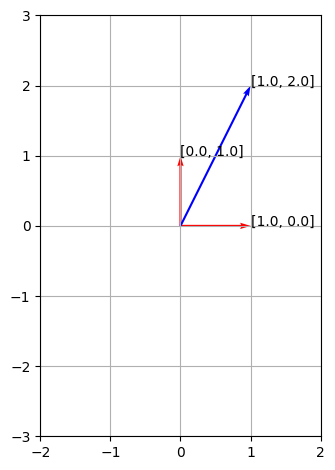

In [22]:
show_vectors(e1,e2,v_standard_basis, color_map = ["r","r", "b"])

In [29]:
b1 = (1/2**0.5)*torch.tensor([[1,1]],dtype = torch.float32).T
b2 =(1/2**0.5)* torch.tensor([[1,-1]],dtype = torch.float32).T # orthonormal basis
new_basis = torch.stack((b1,b2),dim =1).squeeze(-1)
new_basis

tensor([[ 0.7071,  0.7071],
        [ 0.7071, -0.7071]])

In [30]:
# in order to apply the new basis we multiply by the inverse of new_basis
# infact the new_basis matrix is the matrix that we use when we want to calculate the coordinates in the standard basis FROM the basis b1,b2
v_new_basis= torch.linalg.inv(new_basis)@v_standard_basis
v_new_basis

tensor([ 2.1213, -0.7071])

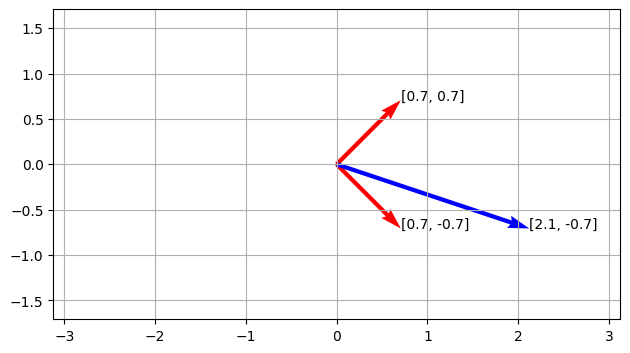

In [31]:
show_vectors(b1,b2,v_new_basis,color_map = ["r","r", "b"])
#imagine rotating your head so that the red arrows become the new x– and y–axes, in that case, the blue vector represents "v_standard_basis" in the new coordinate system.
# EXTREMELY IMPORTANT:
# INFACT a Orthonormal BASE will JUST rotate the plane.

In [ ]:
# the basis could be also NOT orthonormal, in that case the change of base will NOT only rotate the plane, but also skew it in some other ways --> see page 108

# Matrix transformations

In [ ]:
square = torch.tensor([[0,0],[1,0],[0,1],[1,1]])
square

tensor([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]])

In [ ]:
x, y = zip(*square)

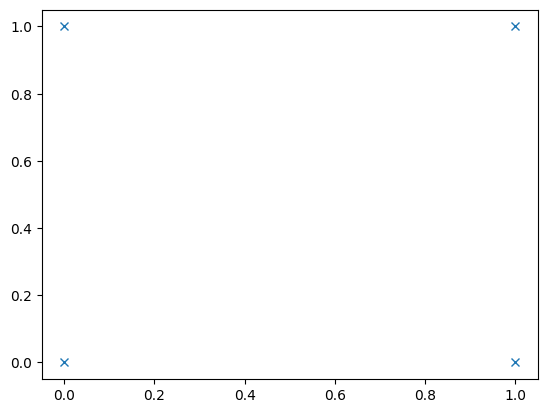

In [ ]:
plt.plot(x,y, "x")

In [ ]:
n = 10
number  = 10

In [ ]:
x = torch.tensor(np.linspace(0,n,number+1))
y = torch.tensor(np.linspace(0,n,number+1))
grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')


In [ ]:
torch.meshgrid(x, y)
# creates 2 matrices, the one for the xs' and the one for the corresponding ys'
# so that we have (0,0), (0,1), (0,2)... (10,8), (10,9), (10,10).

(tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
         [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
         [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
         [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
         [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
         [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
         [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
         [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
         [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
         [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]],
        dtype=torch.float64),
 tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 0.,  1.,  2.,  3.,  4.,  5.,  6., 

In [ ]:
torch.stack([grid_x, grid_y],dim = 0).size()

torch.Size([2, 11, 11])

In [ ]:
torch.stack([grid_x, grid_y], dim = 1).size()

torch.Size([11, 2, 11])

In [ ]:
torch.stack([grid_x, grid_y],dim = 2).size()

torch.Size([11, 11, 2])

In [ ]:
coords_row_ = torch.stack([grid_x, grid_y], dim=-1)
# this way we have 11 lists, each with eleven 2-dimensional vectorsv (coordinates)

In [ ]:
coords_row = coords_row_.view(121, 2).T


In [ ]:
grid_x,grid_y = zip(*coords_row.T) # now we assign to grid_x the first value of each one of the 121 2 dimensioal vectors and the second one to grid_y


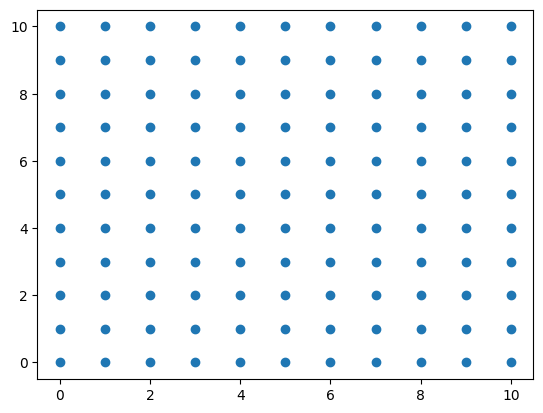

In [ ]:
plt.plot(grid_x,grid_y, "o")
plt.show()

In [ ]:
transformation_matrix = torch.tensor([[3,-1],[1,-1]], dtype = torch.float64)
rotation_matrix = torch.tensor([[torch.cos(torch.tensor(torch.pi/4)),-torch.sin(torch.tensor(torch.pi/4))],[torch.sin(torch.tensor(torch.pi/4)),torch.cos(torch.tensor(torch.pi/4))]], dtype = torch.float64)

In [ ]:
transformation_result = rotation_matrix@coords_row

In [ ]:
x, y = zip(*transformation_result.T)

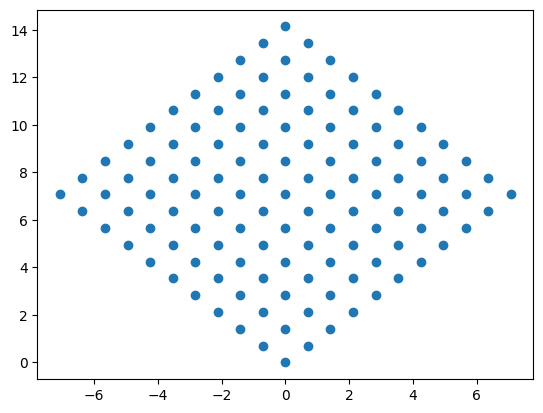

In [ ]:
plt.plot(x,y, "o")

## symmetric matrices

In [ ]:
A = torch.tensor([[9,6],[6,3]])
A

tensor([[9, 6],
        [6, 3]])

In [ ]:
A.T

tensor([[9, 6],
        [6, 3]])

In [ ]:
(A.T == A).all()

tensor(True)

# Inner product

In [ ]:
x = torch.tensor([1.,1.]).T

In [ ]:
torch.norm(x)

tensor(1.4142)

In [ ]:
A_identity = torch.eye(2)
A_identity

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
norm_dot_product_squared = x.T @ A_identity @ x
norm_dot_product = norm_dot_product_squared**0.5
norm_dot_product

tensor(1.4142)

In [ ]:
A = torch.tensor([[1.0,-0.5],[-0.5,1.0]])
norm_inner_product_squared = x.T @ A @ x
norm_dot_product = norm_inner_product_squared**0.5
norm_dot_product

tensor(1.)

In [ ]:
# as long as the matrix is symmetric
A.T == A
# and the quadratic form is always greater than zero (positive definite)

tensor([[True, True],
        [True, True]])

In [ ]:
A2 = torch.tensor([[9,6], [6,3]])

In [ ]:
A2.T==A2 # symmetric but not positive definite

tensor([[True, True],
        [True, True]])

## angles and inner product

In [ ]:
x = torch.tensor([1.0,2.0])
y = torch.tensor([1.0,1.0])

In [ ]:
def distance(x: torch.Tensor, y: torch.Tensor, A: torch.Tensor) -> torch.Tensor:
    """
    Compute the A-metric distance between two vectors.
    If A = I (identity), this reduces to the Euclidean distance.
    """
    diff = x - y
    norm_inner_product_squared = diff.T @ A @ diff
    return torch.sqrt(norm_inner_product_squared)


def inner_product_A(x: torch.Tensor, y: torch.Tensor, A: torch.Tensor) -> torch.Tensor:
    """
    Compute the A-inner product between two vectors.
    If A = I (identity), this reduces to the standard dot product x^T y.
    """
    norm_inner_product_squared = x.T @ A @ y
    return norm_inner_product_squared


def norm(x: torch.Tensor, A: torch.Tensor) -> torch.Tensor:
    """
    Compute the A-quadratic form of a vector (squared A-norm).
    To get the A-norm itself, take torch.sqrt(norm(x, A)).
    If A = I (identity), this returns the squared Euclidean norm.
    """
    norm_inner_product_squared = x.T @ A @ x
    return torch.sqrt(norm_inner_product_squared)


def check_orthogonality(x: torch.Tensor, y: torch.Tensor, A: torch.Tensor = torch.eye(len(x)),atol=1e-8) -> torch.Tensor:
    """
    Check if two vectors are A-orthogonal.
    """
    val = inner_product_A(x, y, A)
    return torch.isclose(val, torch.tensor(0.0, dtype=val.dtype), atol=atol).item()


def check_spd(A):
  """
  check if matrix is symmetric positive definite
  """
  pass



In [ ]:
distance(x,y, torch.eye(2))

tensor(1.)

In [ ]:
norm_x = norm(x, torch.eye(2))
norm_y = norm(y, torch.eye(2))
inner_product_A_ = inner_product_A(x,y, torch.eye(2))

In [ ]:
cosine_similarity = inner_product_A_/(norm_x*norm_y)
cosine_similarity

tensor(0.9487)

In [ ]:

angle_radians = torch.acos(cosine_similarity)
angle_radians

tensor(0.3218)

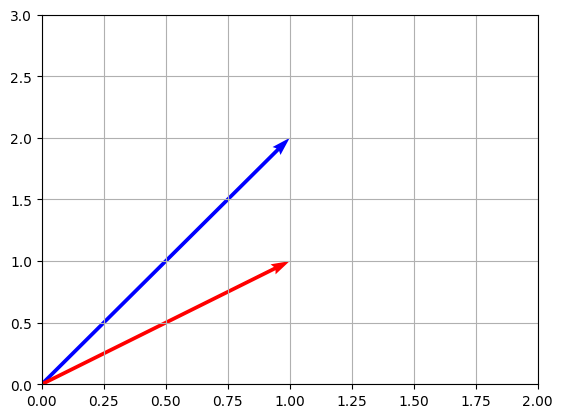

In [ ]:
fig, ax = plt.subplots()

ax.quiver(0, 0, *x, angles='xy', scale_units='xy', scale=1, color='b')
ax.quiver(0, 0, *y, angles='xy', scale_units='xy', scale=1, color='r')

# Set the limits and aspect ratio for a clear plot
ax.set_xlim(0, max(x[0], y[0]) + 1)
ax.set_ylim(0, max(x[1], y[1]) + 1)

ax.grid()

plt.show()

In [ ]:
x = torch.tensor([1.0,0.0])
y = torch.tensor([0.0,1.0])
check_orthogonality(x,y)

True

In [ ]:
check_orthogonality(x,y, A = torch.tensor([[9.0,6.0],[6.0,5.0]]))

False

In [ ]:
x = torch.tensor([1.0,1.0])
y = torch.tensor([-1.0,1.0])

In [ ]:

norm_x = norm(x, torch.eye(2))
norm_y = norm(y, torch.eye(2))
inner_product_A_ = inner_product_A(x,y, torch.eye(2))

In [ ]:
alpha = inner_product_A_/(norm_x*norm_y)
torch.acos(alpha)/(2*torch.pi)*360
# orthogonal

tensor(90.)

In [ ]:
A = torch.tensor([[2.0,0.0],[0.0,1.0]])

norm_x = norm(x, A)
norm_y = norm(y, A)
inner_product_A_ = inner_product_A(x,y, A)


alpha = inner_product_A_/(norm_x*norm_y)
torch.acos(alpha)/(2*torch.pi)*360
# same vectors but different A matrix, not orthogonal

tensor(109.4712)

In [ ]:
# orthogonal matrix
Q = torch.tensor([[0., -1.],
     [1.,  0.]])

In [ ]:
Q@Q.T

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
torch.allclose(Q@Q.T, torch.eye(2))

True

In [ ]:
x_q = Q@x
y_q = Q@y
A = torch.eye(2)

In [ ]:
# orthogonal matrices preserve angles and distances

norm_x = norm(x_q, A)
norm_y = norm(y_q, A)
inner_product_A_ = inner_product_A(x_q,y_q, A)


alpha = inner_product_A_/(norm_x*norm_y)
torch.acos(alpha)/(2*torch.pi)*360

tensor(90.)

## orthonormal basis

In [ ]:
b1 = 1/(2**0.5) * torch.tensor([1,1])
b2 = 1/(2**0.5) * torch.tensor([1,-1])


In [ ]:
norm(b1,torch.eye(2))

tensor(1.0000)

In [ ]:
norm(b2,torch.eye(2))

tensor(1.0000)

In [ ]:
b1.T@b2

tensor(0.)

In [ ]:

def show_vectors(*args: torch.tensor, zoom=1, color_map=None, equal_scale=True):
    fig, ax = plt.subplots()
    if not color_map:
        color_map = ["b"] * len(args)

    for c, vec in zip(color_map, args):
        ax.quiver(0, 0, *vec, angles='xy', scale_units='xy', scale=1, color=c)
        ax.annotate([round(_.item(), 1) for _ in vec], (vec[0].item(), vec[1].item()))

    x_lim = max(abs(vec[0].item()) for vec in args)
    y_lim = max(abs(vec[1].item()) for vec in args)

    ax.set_xlim(-x_lim - zoom, x_lim + zoom)
    ax.set_ylim(-y_lim - zoom, y_lim + zoom)

    if equal_scale:
        ax.set_aspect('equal')  # keep x and y scale the same

    ax.grid()
    plt.tight_layout()
    plt.show()


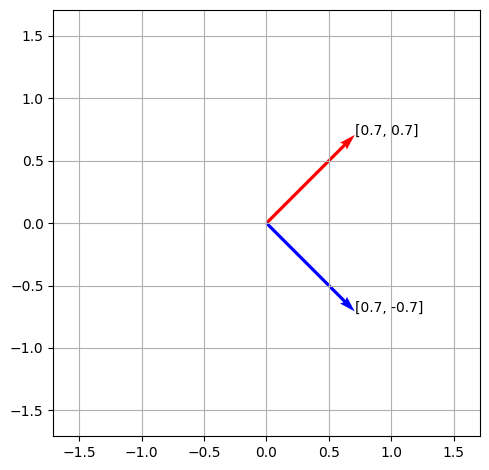

In [ ]:
show_vectors(b1,b2 , color_map = ["r", "b"])

# Projections

## projections to 1d plane (from R^n to a line)

## example 1 [2d -> 1d]

In [ ]:
# project from 2d to 1d

lambda_ = torch.zeros(1,1, dtype = torch.float32) # scalar value multiplied to b to obtain the projection
projection =  torch.zeros(1,2,dtype = torch.float32) # projection
projection_matrix =  torch.zeros(2,2,dtype = torch.float32) # projection matrix

In [ ]:
x = torch.tensor([2.,3.]) # vector to project onto the subspace
b = torch.tensor([[1.,1.]]).T # basis for the subspace we want to project onto, in this case this is a line that passes through the origin (very important condition for any subspaces, with closure to math mult and scalar mult)

# b = (1,1) means  y = x

In [ ]:
lambda_ = (b.T@x)/norm(b, torch.eye(2))**2
lambda_

tensor([[2.5000]])

In [ ]:
projection = (b.T@x)/(norm(b, torch.eye(2))**2)*b
projection

tensor([[2.5000],
        [2.5000]])

In [ ]:
projection_matrix = (b@b.T)/(norm(b, torch.eye(2))**2)


In [ ]:
projection_matrix

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [ ]:
projected = torch.tensor([2.,3.]) @ projection_matrix

In [ ]:
lambda_*b

tensor([[2.5000],
        [2.5000]])

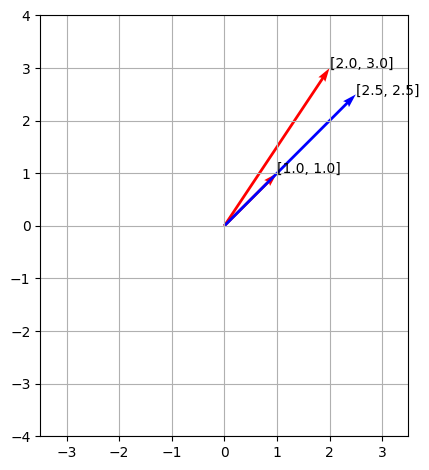

In [ ]:
show_vectors(b, x, projected, color_map = ["r","r", "b"])

## example 2   [3d -> 1d]

In [ ]:
b = torch.tensor([[1.,2.,2.]]).T # another example

In [ ]:
b.shape

torch.Size([3, 1])

In [ ]:
projection_matrix = (b@b.T)/(norm(b, torch.eye(3))**2)
projection_matrix



tensor([[0.1111, 0.2222, 0.2222],
        [0.2222, 0.4444, 0.4444],
        [0.2222, 0.4444, 0.4444]])

### important property of projections

In [ ]:
projection_matrix@projection_matrix # applying 2 times the same matrix, gives the same result!! this is an important property of projection matrices

tensor([[0.1111, 0.2222, 0.2222],
        [0.2222, 0.4444, 0.4444],
        [0.2222, 0.4444, 0.4444]])

In [ ]:
(projection_matrix@projection_matrix).allclose(projection_matrix@projection_matrix, rtol = 10e-10) # P^2 = P

True

In [ ]:
x = torch.tensor([1.,1.,1.])

In [ ]:
projected = x@projection_matrix # value of the projected vector x onto the line
projected

tensor([0.5556, 1.1111, 1.1111])

In [ ]:
lambda_ = (b.T@x)/norm(b, torch.eye(3))**2
lambda_

tensor([[0.5556]])

In [ ]:
lambda_*b # lambda is the value that multiplied by the base of the subspace give you the projection.

tensor([[0.5556],
        [1.1111],
        [1.1111]])

## example 3 [projection onto the x-axis]

In [ ]:
# let's project onto the x axis

In [ ]:
x = torch.tensor([2.,3.]) # vector to project onto the subspace
b = torch.tensor([[1.,0.]]).T # basis for the subspace we want to project onto, in this case this is a line that passes through the origin (very important condition for any subspaces, with closure to math mult and scalar mult)

In [ ]:
lambda_ = (b.T@x)/norm(b, torch.eye(2))**2
lambda_

tensor([[2.]])

In [ ]:
projection = (b.T@x)/(norm(b, torch.eye(2))**2)*b
projection

tensor([[2.],
        [0.]])

In [ ]:
projection_matrix = (b@b.T)/(norm(b, torch.eye(2))**2)
projection_matrix

tensor([[1., 0.],
        [0., 0.]])

In [ ]:
projected = torch.tensor([2.,3.]) @ projection_matrix
projected

tensor([2., 0.])

In [ ]:
lambda_*b

tensor([[2.],
        [0.]])

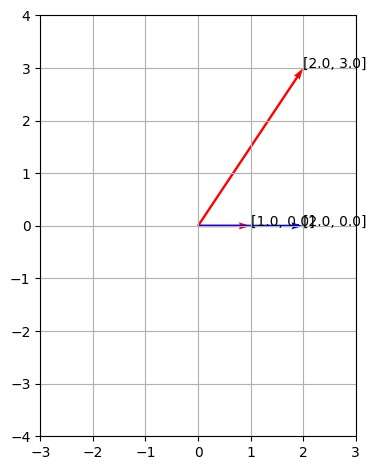

In [ ]:
show_vectors(b, x,projected, color_map = ["r","r", "b"])

## utils

In [ ]:
calculate_projection_matrix = lambda b: (b@b.T)/(norm(b, torch.eye(len(b)))**2)
calculate_lambda = lambda b, x : (b.T@x)/norm(b, torch.eye(len(b)))**2
calculate_projection = lambda b,x: (b.T@x)/(norm(b, torch.eye(len(b)))**2)*b


In [ ]:
x = torch.tensor([2.,3.,4.])
b = torch.tensor([[0.,1.,0.]]).T
x, b

(tensor([2., 3., 4.]),
 tensor([[0.],
         [1.],
         [0.]]))

In [ ]:
calculate_projection_matrix(b)

tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]])

In [ ]:
calculate_lambda(b,x)

tensor([[3.]])

In [ ]:
calculate_projection(b,x)

tensor([[0.],
        [3.],
        [0.]])

In [ ]:
projected = x @ calculate_projection_matrix(b)
projected

tensor([0., 3., 0.])

## generalized projection (dim(U)>1 where U is a subspace of R^n)

### project to 2 dimensions (example 3.11)

In [ ]:
x = torch.tensor([[6.,0.,0.]]).T

In [ ]:
B = torch.tensor([[1.,1.,1.],[0.,1.,2.]]).T # we have to basis, meaning 2 dimnesions

In [ ]:
B

tensor([[1., 0.],
        [1., 1.],
        [1., 2.]])

In [ ]:
B.T@B

tensor([[3., 3.],
        [3., 5.]])

In [ ]:
B.T@x

tensor([[6.],
        [0.]])

In [ ]:
# to find lambda we have to solve the following linear system of equations:
#  B.T@B @ [lambda1, lambda2] = B.T@x


In [ ]:
lambdas_ = torch.linalg.solve(B.T@B, B.T@x)
lambdas_

tensor([[ 5.],
        [-3.]])

In [ ]:
# or we can just calcualte the inverse
lambdas_ = torch.linalg.inv(B.T@B)@B.T@x
lambdas_

tensor([[ 5.],
        [-3.]])

In [ ]:
projections = B@lambdas_
projections

tensor([[ 5.],
        [ 2.],
        [-1.]])

In [ ]:
projection_matrix = B@torch.linalg.inv(B.T@B)@B.T
projection_matrix

tensor([[ 0.8333,  0.3333, -0.1667],
        [ 0.3333,  0.3333,  0.3333],
        [-0.1667,  0.3333,  0.8333]])

In [ ]:
projection_matrix*6

tensor([[ 5.0000,  2.0000, -1.0000],
        [ 2.0000,  2.0000,  2.0000],
        [-1.0000,  2.0000,  5.0000]])

In [ ]:
projection_matrix@x

tensor([[ 5.0000],
        [ 2.0000],
        [-1.0000]])

# Rotations

In [ ]:
alpha = torch.deg2rad(torch.tensor(30))
R = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)],[torch.sin(alpha), torch.cos(alpha)]])
R,alpha

(tensor([[ 0.8660, -0.5000],
         [ 0.5000,  0.8660]]),
 tensor(0.5236))

In [ ]:
test = torch.tensor([1.,2.])
rotated_vector = test@R
rotated_vector

tensor([1.8660, 1.2321])

In [ ]:
bx, by = torch.tensor([0.,1.]), torch.tensor([1.,0.])

In [ ]:
rotated_bx, rotated_by = torch.tensor([0.,1.])@R, torch.tensor([1.,0.])@R

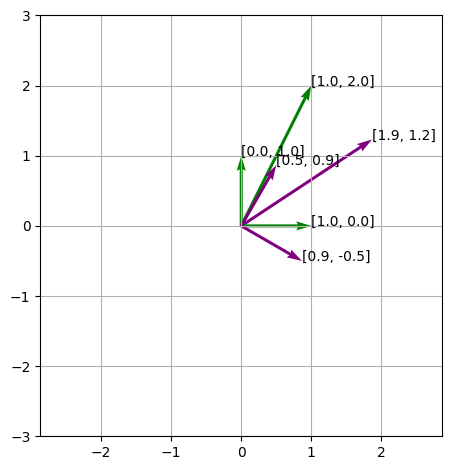

In [ ]:
show_vectors(test,rotated_vector,bx, by,rotated_bx, rotated_by,color_map = ["green","purple","green","green", "purple","purple"], zoom = 1)

In [ ]:
x = torch.tensor(np.linspace(0,10,11), dtype = torch.float32)
y = torch.tensor(np.linspace(0,10,11),dtype = torch.float32)

In [ ]:
coords = torch.stack(torch.meshgrid(x,y),-1).view(121,2).T
grid_x,grid_y = zip(*coords.T)


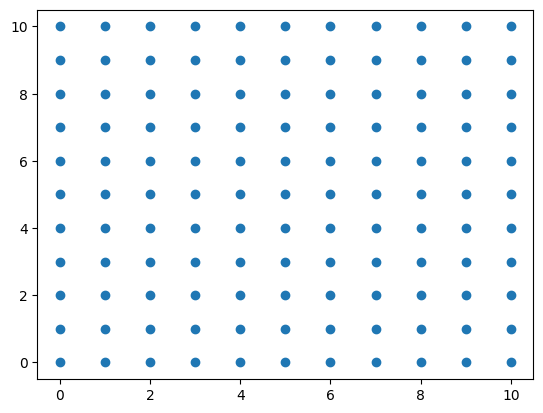

In [ ]:
plt.plot(grid_x,grid_y, "o")
plt.show()

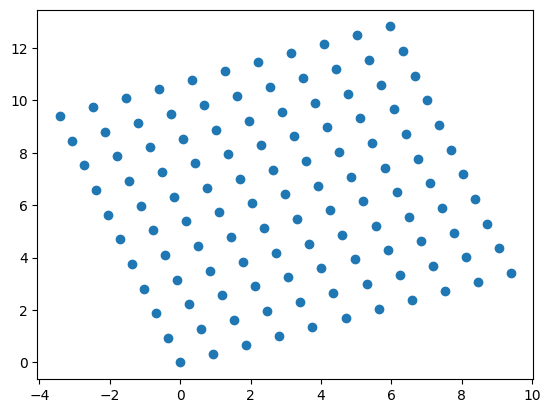

In [ ]:
alpha = torch.deg2rad(torch.tensor(20)) # rotation is counterclockwise for convention
R = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)],[torch.sin(alpha), torch.cos(alpha)]])
R,alpha
coords_row_rotated = R@coords
grid_x,grid_y = zip(*coords_row_rotated.T)
plt.plot(grid_x,grid_y, "o")
plt.show()

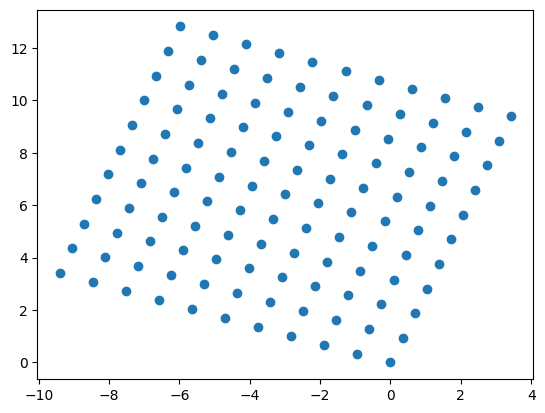

In [ ]:
alpha = torch.deg2rad(torch.tensor(70)) # rotation is counterclockwise for convention
R = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)],[torch.sin(alpha), torch.cos(alpha)]])
R,alpha
coords_row_rotated = R@coords
grid_x,grid_y = zip(*coords_row_rotated.T)
plt.plot(grid_x,grid_y, "o")
plt.show()

## exercises

In [ ]:
distance(torch.tensor([1,2,3], dtype = torch.float32), torch.tensor([-1,-1,0],dtype = torch.float32), torch.eye(3))

tensor(4.6904)

In [ ]:
distance(torch.tensor([1,2,3], dtype = torch.float32), torch.tensor([-1,-1,0],dtype = torch.float32), torch.tensor([[2,1,0],[1,3,-1],[0,-1,2]], dtype = torch.float32))

tensor(6.8557)

# Eigen Values and Vectors

In [ ]:
# given a square nxn matrix A, it is invertible if and only if the determinant is not zero, determinant is not zero if and only if the matrix is full rank (rank(A) = n)

In [ ]:
A = torch.tensor([[1,2,3],[2,4,6],[0,4,1]], dtype = torch.float32)

In [ ]:
torch.allclose(torch.linalg.det(A), torch.tensor(0.),atol=1e-5)

# atol (absolute tolerance): how close the numbers can be in absolute terms. Important when comparing to zero.
# rtol (relative tolerance): how close they can be relative to the size of b

True

In [ ]:
torch.linalg.inv(A)

tensor([[ 2.7962e+07, -1.3981e+07, -5.0000e-01],
        [ 2.7962e+06, -1.3981e+06,  2.5000e-01],
        [-1.1185e+07,  5.5924e+06,  0.0000e+00]])

In [ ]:
n = A.shape[0]
torch.linalg.matrix_rank(A)<n

tensor(True)

In [ ]:
trace = lambda M: sum([M[i][i] for i in range(M.size()[-1])])

In [ ]:
trace(torch.eye(10))

tensor(10.)

In [ ]:
A = torch.tensor([[1,2,3],[2,3,4]],dtype = torch.float32) #2x3
K = torch.tensor([[1,2,4,5],[3,4,3,5], [3,1,2,3]],dtype = torch.float32) #3x4
L = torch.tensor([[2,3],[1,2],[4,5],[3,5]],dtype = torch.float32) # 4x2

# invariant to cyclic transformations

In [ ]:
trace(A@K@L)

tensor(600.)

In [ ]:
trace(K@L@A)

tensor(600.)

In [ ]:
x = torch.tensor([[1,3,2]])
y = torch.tensor([[3,4,2]])

trace(x@y.T) == trace(y@x.T)

tensor(True)

## eigen vectors and eigen values

In [ ]:
A = torch.tensor([[4,2],[1,3]], dtype = torch.float32)
A

tensor([[4., 2.],
        [1., 3.]])

In [ ]:
torch.linalg.eigvals(A)

tensor([5.0000+0.j, 2.0000+0.j])

In [ ]:
eigen_value = 2

In [ ]:
A-eigen_value*torch.eye(2)

tensor([[2., 2.],
        [1., 1.]])

In [ ]:
try:
  torch.linalg.solve(A-eigen_value*torch.eye(2), torch.zeros((2,1)))
except Exception as e:
  print(f"this error is expected, infact we defined the eigen_value such that the above system has non trivial infinite solutions,\n\nerror: {e}")

this error is expected, infact we defined the eigen_value such that the above system has non trivial infinite solutions,

error: torch.linalg.solve: The solver failed because the input matrix is singular.


In [ ]:
eigenvalues, eigenvectors = torch.linalg.eig(A)
eigenvectors # they are normalized
# https://docs.pytorch.org/docs/stable/generated/torch.linalg.eig.html
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [ ]:
eigenvectors

tensor([[ 0.8944, -0.7071],
        [ 0.4472,  0.7071]])

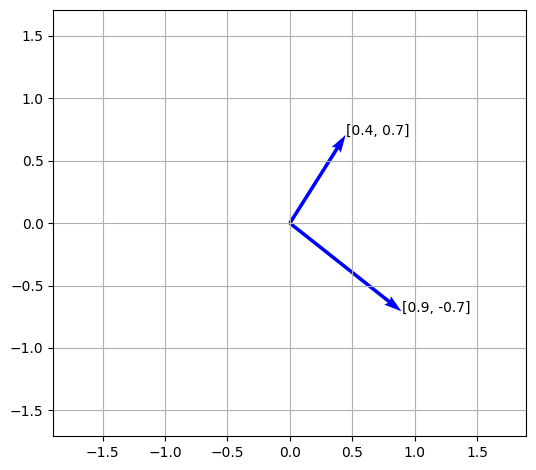

In [ ]:
show_vectors(*eigenvectors)

## show eigen values and vectors

In [ ]:
A1 = torch.tensor([[0.5,0],[0,2]], dtype = torch.float32)
A2 = torch.tensor([[1,0.5],[0,1]], dtype = torch.float32)
# alpha = torch.deg2rad(torch.tensor(30)) # rotation is counterclockwise for convention
# A3 = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)],[torch.sin(alpha), torch.cos(alpha)]])

A4 = torch.tensor([[1,-1],[-1,1]],dtype = torch.float32)


A5 = torch.tensor([[1,0.5],[0.5,1]], dtype = torch.float32)

A = A4




In [ ]:
def create_grid(n, plot=False, transformation_matrix: torch.Tensor = None):
    x = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    y = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')
    coords_row_ = torch.stack([grid_x, grid_y], dim=-1)
    coords_row = transformation_matrix @ coords_row_.view((n+1)**2, 2).T
    grid_x, grid_y = zip(*coords_row.T)

    if plot:
        plt.plot(grid_x, grid_y, "o")
        plt.axis("equal")
        plt.show()
        return

    return grid_x, grid_y
# there was an error, the book performs the transformation on a column x vector --> i was doing it on a row x vector
# coords_row = coords_row_.view((n+1)**2, 2) @ transformation_matrix --> applying on a row vector --> x @ A --> 1x2 @ 2x2 (in our case we have nx2 @ 2x2 because we have multiple vectors)
# the book applyis the transformation on a vector 2x1 --> so we have to transpose x to do the same thing --> A @ x.T --> 2x2 @ 2x1
# so we just do this: transformation_matrix @ coords_row_.view((n+1)**2, 2).T

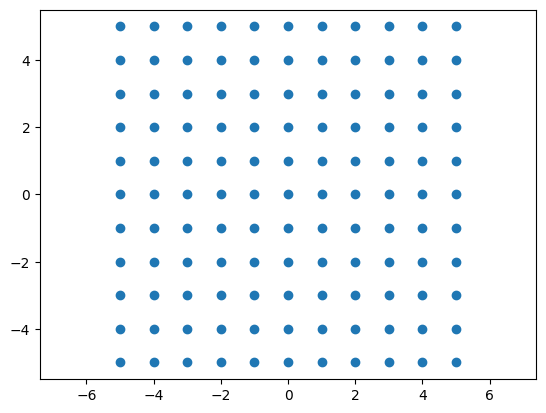

In [ ]:
coords = create_grid(10,plot = True, transformation_matrix = torch.eye(2))

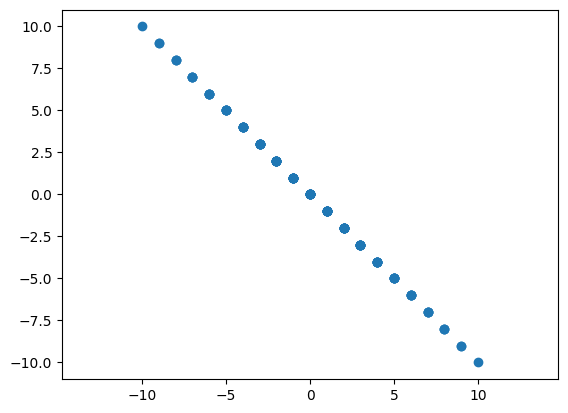

In [ ]:
create_grid(10,plot = True, transformation_matrix = A)
# The matrix acts simply (just scaling) on the eigenvector directions.
# Eigenvectors → the “clean” directions where the matrix only stretches (or shrinks) with no rotation or warping.
# Eigenvalues → how much the stretch/shrink happens along those directions.
# All other vectors → are combinations of the eigenvectors, so when the matrix acts, each component is stretched differently, and the result looks warped or tilted.

In [ ]:
eigenvalues, eigenvectors = torch.linalg.eig(A)

eigenvalues = torch.round(eigenvalues.real, decimals=3)
eigenvectors = torch.round(eigenvectors.real,decimals=3)
print(eigenvectors)
print(eigenvalues)
# PyTorch shows all eigenvectors in one matrix: the first row = x parts, the second row = y parts. Each column is one full eigenvector.

tensor([[ 0.7070,  0.7070],
        [-0.7070,  0.7070]])
tensor([2., 0.])


In [ ]:
v1 = eigenvalues[0]*eigenvectors[:, 0]
v2 = eigenvalues[1]*eigenvectors[:, 1]


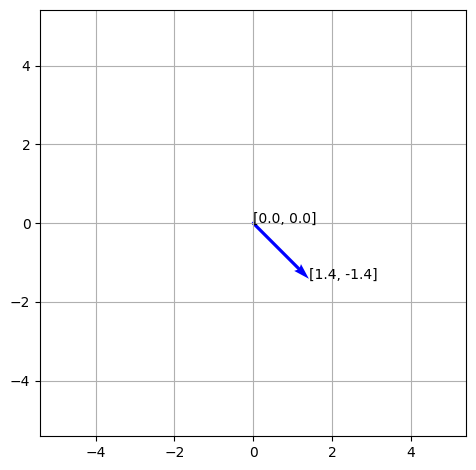

In [ ]:
show_vectors(v1,v2, zoom = 4)

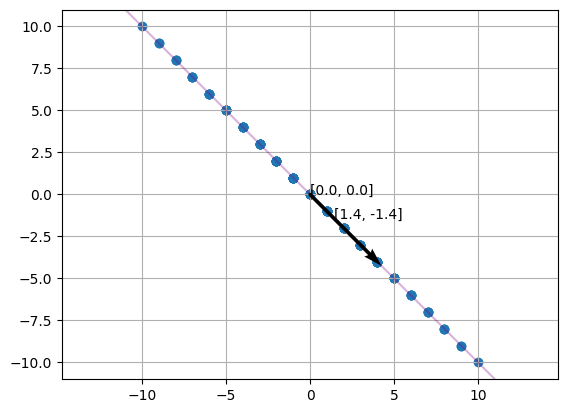

In [ ]:
def show_transform_eig(n, *args, transformation_matrix= None):
    scale_viz_factor = 3 # only for a better visualization

    x = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    y = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')
    coords_row_ = torch.stack([grid_x, grid_y], dim=-1)
    coords_row = transformation_matrix@ coords_row_.view((n+1)**2, 2).T # .view(-1, 2).T we can make pytorch infere the dimension

    grid_x, grid_y = zip(*coords_row.T)

    fig, ax = plt.subplots()
    ax.plot(grid_x, grid_y, "o", zorder=1)
    for vec in args:
      ax.quiver(0, 0, *vec * scale_viz_factor, angles='xy', scale_units='xy', scale=1,zorder=3)
      ax.annotate([round(_.item(),1) for _ in vec], vec)
      if not torch.allclose(vec, torch.zeros(1,2)):
        ax.axline(vec, vec*2, color = "purple", alpha = 0.3, zorder=2)

    ax.axis("equal")
    ax.grid()
    plt.show()


show_transform_eig(10, v1, v2,transformation_matrix=A)


In [ ]:
# all points that are not on the line of the eigenvectors will be stretched along BOTH the eigen vectors, all
# the points that are on the same line as a specific eigen vector, will be stretched only by that eigen vector
# the amount by which it is stretched is calcualted using the eigen value that corresponds to that eigen vector.

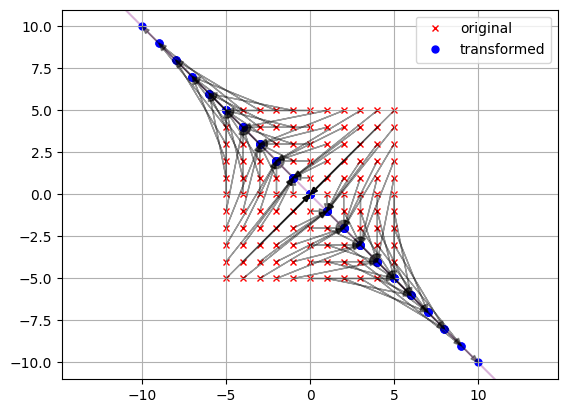

In [ ]:
def show_transformation_eig(n, *args, transformation_matrix= None):
    scale_viz_factor = 3 # only for a better visualization

    x = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    y = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')

    coords_row_ = torch.stack([grid_x, grid_y], dim=-1).view(-1, 2)
    coords_row_transformed = (transformation_matrix@ coords_row_.T).T


    fig, ax = plt.subplots()
    for p, q in zip(coords_row_, coords_row_transformed):
        # print(f"{p}-->{q}")
        ax.arrow(p[0].item(), p[1].item(),(q[0]-p[0]).item(), (q[1]-p[1]).item(), head_width=0.3, length_includes_head = True,color  = "black", alpha=0.4,zorder=3)
    for vec in args:
      if not torch.allclose(vec, torch.zeros(1,2)):
        ax.axline(vec, vec*2, color = "purple", alpha = 0.3,zorder=0)
    ax.plot(coords_row_[:,0], coords_row_[:,1], "rx", label="original", markersize = 4,zorder=1)
    ax.plot(coords_row_transformed[:,0], coords_row_transformed[:,1], "bo", label="transformed",markersize = 5,zorder=1)


    ax.axis("equal")
    ax.grid()
    ax.legend()

    plt.show()


show_transformation_eig(10, v1, v2,transformation_matrix=A)
# as we can see all vectors are transformed in a combination of the 2 eigen vectors (weighted by the corresponding eigenvalue)
# all other values get a mix of the two transformations

In [ ]:
# as we can clearly see, eigen vectors tells us the "lines" on which reside vectors (points)
# that get simpler transformations --> stretchs in only ONE direction (one of the 2 eigen vectors).

## Interactive Visualization

In [ ]:
# @title interactive {"run":"auto","vertical-output":true}
from ipywidgets import interact, FloatSlider, IntSlider

CURRENT_MATRIX = None

def _plot_transform_with_eigs(a11=1.0, a12=0.0, a21=0.0, a22=1.0, n=3):
    global CURRENT_MATRIX
    CURRENT_MATRIX = np.array([[a11, a12],
                               [a21, a22]], dtype=float)

    grid_half_extent = 10.0
    arrow_head_width = 0.1
    arrow_alpha = 0.35
    point_size = 4.0
    transformed_point_size = 5.0

    x = torch.tensor(np.linspace(-grid_half_extent, grid_half_extent, n+1), dtype=torch.float32)
    y = torch.tensor(np.linspace(-grid_half_extent, grid_half_extent, n+1), dtype=torch.float32)
    grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')
    coords_row_ = torch.stack([grid_x, grid_y], dim=-1).view(-1, 2)

    A = torch.tensor(CURRENT_MATRIX, dtype=torch.float32)
    coords_row_transformed = (A @ coords_row_.T).T

    fig, ax = plt.subplots(figsize=(8,8))

    for p, q in zip(coords_row_, coords_row_transformed):
        ax.arrow(
            p[0].item(), p[1].item(),
            (q[0]-p[0]).item(), (q[1]-p[1]).item(),
            head_width=arrow_head_width,
            length_includes_head=True,
            color="black",
            alpha=arrow_alpha,
            zorder=3
        )

    vals, vecs = np.linalg.eig(CURRENT_MATRIX)
    drew_any = False
    for i in range(2):
        lam = vals[i]
        v = vecs[:, i]
        if np.iscomplex(lam) or np.iscomplexobj(v):
            continue
        if np.allclose(v, 0):
            continue
        v = np.real(v)
        v = v / (np.linalg.norm(v) + 1e-12)
        p1 = v * (grid_half_extent * 2.0)
        p0 = -p1
        ax.plot([p0[0], p1[0]], [p0[1], p1[1]], color="purple", alpha=0.8, zorder=0)
        drew_any = True

    ax.plot(coords_row_[:,0], coords_row_[:,1], "rx", label="original", markersize=point_size, zorder=1, alpha=0.3)
    ax.plot(coords_row_transformed[:,0], coords_row_transformed[:,1], "bo", label="transformed", markersize=transformed_point_size, zorder=1)

    ax.axhline(0, color="gray", linewidth=1, alpha=0.5)
    ax.axvline(0, color="gray", linewidth=1, alpha=0.5)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, alpha=0.25)
    ax.legend()

    pad = grid_half_extent * 0.8 + 5.0
    ax.set_xlim(-grid_half_extent - pad, grid_half_extent + pad)
    ax.set_ylim(-grid_half_extent - pad, grid_half_extent + pad)

    plt.show()

interact(
    _plot_transform_with_eigs,
    n=IntSlider(value=10, min=2, max=30, step=1, description="Grid n"),
    a11=FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.5, description="a11"),
    a12=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.5, description="a12"),
    a21=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.5, description="a21"),
    a22=FloatSlider(value=1.0, min=-3.0, max=3.0, step=0.5, description="a22"),
);


interactive(children=(FloatSlider(value=1.0, description='a11', max=3.0, min=-3.0, step=0.5), FloatSlider(valu…

scaled eigenvector 1: tensor([1., 0.])
scaled eigenvector 2: tensor([0., 1.])
eigenvalues: tensor([1., 1.])


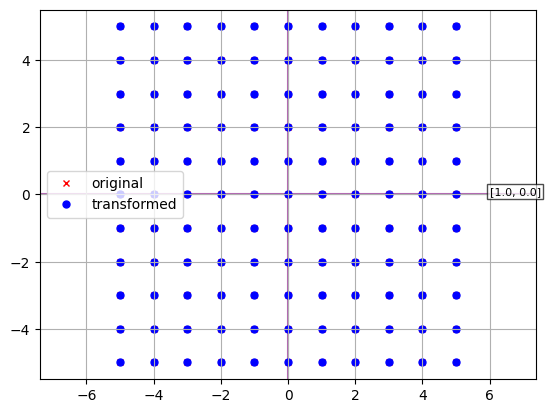

In [ ]:
# @title snapshot of Interactive {"run":"auto","vertical-output":true,"form-width":"50%"}
CURRENT_MATRIX_c = torch.tensor(CURRENT_MATRIX, dtype = torch.float32)
eigenvalues, eigenvectors = torch.linalg.eig(CURRENT_MATRIX_c)

eigenvalues = torch.round(eigenvalues.real, decimals=3)
eigenvectors = torch.round(eigenvectors.real,decimals=3)


v1 = eigenvalues[0]*eigenvectors[:, 0]
v2 = eigenvalues[1]*eigenvectors[:, 1]
print(f"scaled eigenvector 1: {torch.round(v1,decimals = 1)}")
print(f"scaled eigenvector 2: {torch.round(v2, decimals = 1)}")
print(f"eigenvalues: {torch.round(eigenvalues,decimals = 2)}")

def show_transformation_eig(n, *args, transformation_matrix= None):
    scale_viz_factor = 3 # only for a better visualization

    x = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    y = torch.tensor(np.linspace(-n/2, n/2, n+1), dtype=torch.float32)
    grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')

    coords_row_ = torch.stack([grid_x, grid_y], dim=-1).view(-1, 2)
    coords_row_transformed = (transformation_matrix@ coords_row_.T).T


    fig, ax = plt.subplots()
    for p, q in zip(coords_row_, coords_row_transformed):
        # print(f"{p}-->{q}")
        ax.arrow(p[0].item(), p[1].item(),(q[0]-p[0]).item(), (q[1]-p[1]).item(), head_width=0.3, length_includes_head = True,color  = "black", alpha=0.4,zorder=3)
    for vec in args:
      if not torch.allclose(vec, torch.zeros(1,2)):
          ax.axline(vec, vec*2, color="purple", alpha=0.6, zorder=0)
          ax.annotate(
              [round(_.item(),1) for _ in vec],
              vec * 6,  # shift text a bit away from the vector tip
              bbox=dict(boxstyle="square,pad=0.2", fc="white", ec="black", alpha=0.7),
              fontsize=8,
              zorder=4
          )
    ax.plot(coords_row_[:,0], coords_row_[:,1], "rx", label="original", markersize = 4,zorder=1)
    ax.plot(coords_row_transformed[:,0], coords_row_transformed[:,1], "bo", label="transformed",markersize = 5,zorder=1)


    ax.axis("equal")
    ax.grid()
    ax.legend()

    plt.show()


show_transformation_eig(10, v1, v2,transformation_matrix=CURRENT_MATRIX_c)
# as we can see all vectors are transformed in a combination of the 2 eigen vectors (weighted by the corresponding eigenvalue)
# all other values get a mix of the two transformations

## theorems on eigen

In [ ]:
# For symmetric matrices, eigenvectors corresponding to different eigenvalues are orthogonal. Therefore, they are also linearly independent
inner_product_A(v1,v2, torch.eye(2)) # infact the inner product is zero. inner product in this case measures how much the 2 vectors point in the same direction,
                                     # they are orthogonal thus they have completely different directions

tensor(0.)

In [ ]:
# spectral theorem ensures us that, given a symmetric matrix A there exist a orthonormal basis of its vector space V consisting of EigenVectors of A and each eigenvector is REAL

## **matrix decomposition**

| Method                                 | When it works (requirements)                                                                                                                                       | Output form                                  |                                                                                 |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------- | ------------------------------------------------------------------------------------ |
| **Diagonalization**                    | Square matrix $A \in \mathbb{R}^{n\times n}$ that has $n$ linearly independent eigenvectors (i.e. diagonalizable). Guaranteed if $A$ is symmetric/Hermitian. | $A = P D P^{-1}$ (or $P D P^T$ if symmetric) |  |
| **SVD (Singular Value Decomposition)** | **Any** real (or complex) matrix $A \in \mathbb{R}^{m\times n}$, no restrictions on square/symmetry.                                                               | $A = U \Sigma V^T$                           |           |
| **Cholesky**                           | Square, symmetric, positive definite $A \in \mathbb{R}^{n\times n}$ (Requires all eigenvalues > 0)                                                                                               | $A = L L^T$ with $L$ lower triangular        |

#### Cholensky

In [ ]:
def check_spd(A):
    """ A is positive definite iff all eigenvalues are strictly positive. A is symmetric if A = A.t"""
    # check symmetric
    if not torch.allclose(A, A.T, atol=1e-8):
        return False
    # check eigenvalues > 0
    eigvals = torch.linalg.eigvalsh(A)  # works for Hermitian/symmetric, hermitian is just symmetric in complex plane
    return torch.all(eigvals > 0).item()
# explanation on the notebook, but mainly it is because a matrix is positive definite iff x.T @ A @ x >=0
# --> we can write, asssuming the matrix A is symmetric, given spectral theorem and diagonalization
# to the conclusion that x.T @ A @ x = lambda_1 y1^2 + lambda_2 y2^2 ... where lambda_n >0 per ogni x, thus

In [ ]:
A = torch.tensor([[2,1],[1,2]], dtype = torch.float32)
check_spd(A)

True

In [ ]:
C = torch.linalg.cholesky(A) # this method needs the matrix to be symmetric positive definite

In [ ]:
C@C.T # by construction is the matrix A

tensor([[2.0000, 1.0000],
        [1.0000, 2.0000]])

#### Diagonalization

In [ ]:
# Requires a full set of independent eigenvectors

# how to check this:
# Compute eigenvalues and eigenvectors.
# Count how many independent eigenvectors you get.
# If that number = matrix size, diagonalizable.

# in other words, we have to check if the eigenvectors form a basis for R^n where n is the dimension of the square matrix.
# this is because it is central to this kind of matrix decomposition techniques that P is invertible
# D = P^-1 @ A @ P --> in particular, P in this specific case represents the matrix that contains all the eigen vectors,
# that in order to be invertible NEEDS the eigen vectors to be indipendent.
# infact  D = P^-1 @ A @ P is in general a way to change base, where P represents the matrix to change basis to a vector.
A = 0.5 * torch.tensor([[5,-2],[-2,5]], dtype = torch.float32)

In [ ]:
eigenvalues, eigenvectors = torch.linalg.eig(A)
real_eigenvalues, real_eigenvectors = torch.real(eigenvalues),torch.real(eigenvectors) # P is the matrix that collects all eigenvectors as columns

In [ ]:
real_eigenvectors

tensor([[ 0.7071,  0.7071],
        [-0.7071,  0.7071]])

In [ ]:
torch.round(torch.linalg.inv(real_eigenvectors) @ A @ real_eigenvectors,decimals = 2)

tensor([[3.5000, 0.0000],
        [0.0000, 1.5000]])

In [ ]:
A = torch.tensor([[2,1],[1,2]], dtype = torch.float32)
eigenvalues, eigenvectors = torch.linalg.eig(A)
real_eigenvalues, real_eigenvectors = torch.real(eigenvalues),torch.real(eigenvectors) # P is the matrix that collects all eigenvectors as columns
torch.round(torch.linalg.inv(real_eigenvectors) @ A @ real_eigenvectors,decimals = 2) # the book is not mistaken, it just ordered the eigenvalues in P differently.

tensor([[3., 0.],
        [0., 1.]])

In [ ]:
A = torch.tensor([[2,1],[1,2]], dtype = torch.float32)
eigenvalues, eigenvectors = torch.linalg.eig(A)

real_eigenvalues, real_eigenvectors = torch.real(eigenvalues),torch.real(eigenvectors) # P is the matrix that collects all eigenvectors as columns

# # swap the vectors ##################################################
# sorted_indices = torch.argsort(real_eigenvalues)                    #
# real_eigenvalues = real_eigenvalues[sorted_indices]                 #
# real_eigenvectors = real_eigenvectors[:, sorted_indices]            #
# #####################################################################

D = torch.round(torch.linalg.inv(real_eigenvectors) @ A @ real_eigenvectors,decimals = 1) # the book is not mistaken, it just ordered the eigenvalues in P differently.
D

tensor([[3., 0.],
        [0., 1.]])

In [ ]:
D = torch.diag(torch.real(eigenvalues)) # D is just the diagonal matrix containing the eigenvalues

In [ ]:
A

tensor([[2., 1.],
        [1., 2.]])

In [ ]:
P = torch.real(eigenvectors)
P # eigenvectors are represented in columns
#   one eigenvector     the other eigenvector
#             |           |
#             V           V
#  tensor([[ 0.7071, -0.7071],
#          [ 0.7071,  0.7071]])
#

tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])

In [ ]:
p1 = P[:, 0] # row, column
p2 = P[:, 1]

In [ ]:
torch.round(P@D@torch.linalg.inv(P), decimals = 1) # this is A

tensor([[2., 1.],
        [1., 2.]])

In [ ]:
eigenvalues, eigenvectors = torch.linalg.eig(A)
torch.real(eigenvectors)

tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])

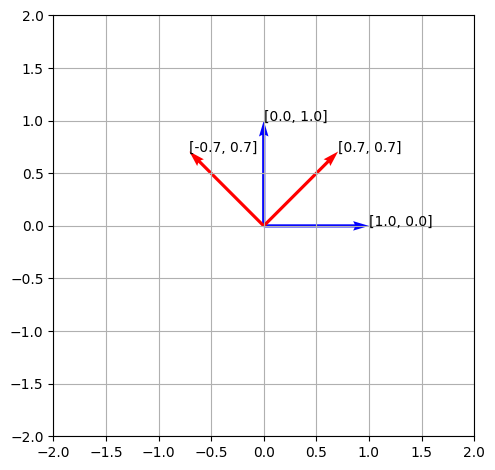

In [ ]:
A = torch.tensor([[2,1],[1,2]], dtype = torch.float32)
eigenvalues, eigenvectors = torch.linalg.eig(A)

real_eigenvalues, real_eigenvectors = torch.real(eigenvalues),torch.real(eigenvectors) # P is the matrix that collects all eigenvectors as columns



D = torch.diag(torch.real(eigenvalues)) # D is just the diagonal matrix containing the eigenvalues
P = torch.real(eigenvectors) # P represents the eigenvectors stacked in 2 columns
e1 = torch.tensor([1,0], dtype = torch.float32)
e2 = torch.tensor([0,1], dtype = torch.float32)

p1 = P[:, 0]   # first eigenvector (column 0)  # torch.tensor([1,-1], dtype = torch.float32)
p2 = P[:, 1]   # second eigenvector (column 1) # torch.tensor([1,1], dtype = torch.float32)

show_vectors(
    e1,e2,p1,p2, # vectors p1,p2 are the eigenvectors of A, we use them because they are nice to see. we plot them in base e1,e2
    # torch.linalg.inv(P)@p1,torch.linalg.inv(P)@p2, # we apply P^-1 --> this is changing the basis from e1,e2 to p1,p2, the new basis are the eigenvectors
    # D@torch.linalg.inv(P)@p1,D@torch.linalg.inv(P)@p2, # scale by corresponding eigenvalue
    # P@D@torch.linalg.inv(P)@p1,P@D@torch.linalg.inv(P)@p2, # reapply change of base to return to original coordinate frame

    # A@p1,A@p2, # as we can see the above transformations are exactly the same as applying the transformation A directly
    color_map = ["b","b","r","r", "g","g", "purple","purple"]
    )

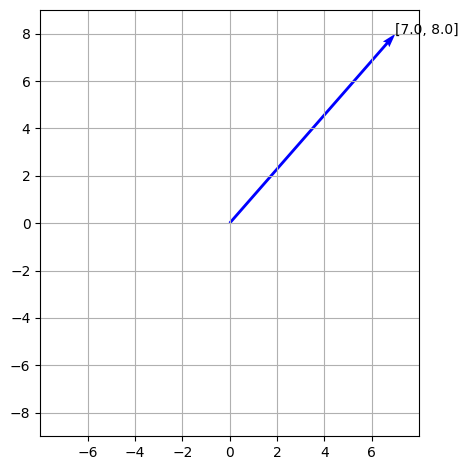

In [ ]:
A = torch.tensor([[2,1],[1,2]], dtype = torch.float32)
eigenvalues, eigenvectors = torch.linalg.eig(A)

real_eigenvalues, real_eigenvectors = torch.real(eigenvalues),torch.real(eigenvectors) # P is the matrix that collects all eigenvectors as columns



D = torch.diag(torch.real(eigenvalues)) # D is just the diagonal matrix containing the eigenvalues
P = torch.real(eigenvectors) # P represents the eigenvectors stacked in 2 columns
e1 = torch.tensor([1,0], dtype = torch.float32)
e2 = torch.tensor([0,1], dtype = torch.float32)

x = torch.tensor([2,3], dtype= torch.float32)
show_vectors(
    # e1,e2,x, # vector in base e1,e2
    # p1,p2,torch.linalg.inv(P)@x, # change base and calculate vector x in new coordinate system p1,p2 (eigenvectors)
    # D@torch.linalg.inv(P)@x,# apply transformation
    P@D@torch.linalg.inv(P)@x, # return to e1,e2 basis

    # A@x,
    color_map = ["b","b","r","r", "g","g", "purple","purple"],
    )

#### SVD

In [ ]:
torch.linalg.svd(A)

torch.return_types.linalg_svd(
U=tensor([[-0.7071, -0.7071],
        [-0.7071,  0.7071]]),
S=tensor([3.0000, 1.0000]),
Vh=tensor([[-0.7071, -0.7071],
        [-0.7071,  0.7071]]))